# Informações Relevantes sobre os dados

Esse *dataset* foi disponibilizado publicamente no site da UCI Machine Learning Repository, disponível em: <http://archive.ics.uci.edu/ml/datasets/Bank+Marketing>. 

Os dados foram coletados do Banco de Portugal, em: <https://www.bportugal.pt/estatisticasweb>


# Variáveis Analisadas

### Características dos clientes:

1 - [idade] age (numeric)

2 - [emprego] job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - [estado_civil] marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - [educação] education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - [inadimplência] default: has credit in default? (categorical: "no","yes","unknown")

6 - [empréstimo_imobiliario] housing: has housing loan? (categorical: "no","yes","unknown")

7 - [empréstimo]: has personal loan? (categorical: "no","yes","unknown")

### Último contato feito:

8 - [forma_contato] contact: contact communication type (categorical: "cellular","telephone") 

9 - [mês_contato] month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - [dia_contato] day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - [duração_contato] duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Outros atributos do cliente na campanha:

12 - [num_contatos] campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - [dias_ultimo_contato] pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - [contatos_anteriores] previous: number of contacts performed before this campaign and for this client (numeric)

15 - [resultado_anterior] poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Contexto socioeconômico dos clientes:

16 - [indice_desemprego] emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - [CPI] cons.price.idx: consumer price index - monthly indicator (numeric)     

18 - [CCI] cons.conf.idx: consumer confidence index - monthly indicator (numeric)  

19 - [Euribor] euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - [num_empregados] nr.employed: number of employees - quarterly indicator (numeric)

### Variável-Alvo:

21 - [resultado] y: has the client subscribed a term deposit? (binary: "yes","no")

# Valores Faltantes

Todos os valores faltantes foram imputados como "unknown".

# Importação de Dados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
dados = pd.read_csv("../dados/bank-additional-full.csv", sep=";")

dados = dados.rename(columns={
    "age":"idade",
    "job":"emprego",
    "marital":"estado_civil",
    "education":"educacao",
    "default":"inadimplencia",
    "housing":"emprestimo_imobiliario",
    "loan":"emprestimo",
    "contact":"forma_contato",
    "month":"mes_contato",
    "day_of_week":"dia_contato",
    "duration":"duracao_contato",
    "campaign":"num_contatos",
    "pdays":"dias_ultimo_contato",
    "previous":"contatos_anteriores",
    "poutcome":"resultado_anterior",
    "emp.var.rate":"indice_desemprego",
    "cons.price.idx":"CPI",
    "cons.conf.idx":"CCI",
    "euribor3m":"Euribor",
    "nr.employed":"num_empregados",
    "y":"resultado"
})
dados.head()

,idade,emprego,estado_civil,educacao,inadimplencia,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,...,num_contatos,dias_ultimo_contato,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Limpeza de Dados

Devemos verificar:
* estrutura
* granularidade
* escopo
* temporalidade
* corretude

Operações:
* Limpeza de NAs
* padronizações
* tipagem

## Lidando com os NA's

Os dados faltantes das colunas de "Características dos Clientes" foram imputados com a palavra "unknown". Além disso, os valores faltantes da coluna "pdays" foram imputados com "999". 

Para tratá-los, precisamos converter todos os dados faltantes para o formato NaN, de forma a facilitar sua transformação.

In [3]:
df = dados.copy()
df = df.apply(lambda x: x.replace('unknown', np.nan))
df["dias_ultimo_contato"] = df["dias_ultimo_contato"].replace(999, np.nan)

In [4]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   41188 non-null  int64  
 1   emprego                 40858 non-null  object 
 2   estado_civil            41108 non-null  object 
 3   educacao                39457 non-null  object 
 4   inadimplencia           32591 non-null  object 
 5   emprestimo_imobiliario  40198 non-null  object 
 6   emprestimo              40198 non-null  object 
 7   forma_contato           41188 non-null  object 
 8   mes_contato             41188 non-null  object 
 9   dia_contato             41188 non-null  object 
 10  duracao_contato         41188 non-null  int64  
 11  num_contatos            41188 non-null  int64  
 12  dias_ultimo_contato     1515 non-null   float64
 13  contatos_anteriores     41188 non-null  int64  
 14  resultado_anterior      41188 non-null

Podemos observar que há valores faltantes nas colunas "inadimplência", "educação", "emprego", "empréstomo_imobiliário", "empréstimo" e "dias_último_contato". Vamos verificar o quanto isso representa do total de amostras, individualmente.

In [5]:
tmp = df[["inadimplencia", "educacao", "emprego", "emprestimo_imobiliario", "emprestimo", "dias_ultimo_contato"]]
tmp.isna().sum().sort_values(ascending=False)/len(df)

dias_ultimo_contato       0.963217
inadimplencia             0.208726
educacao                  0.042027
emprestimo_imobiliario    0.024036
emprestimo                0.024036
emprego                   0.008012
dtype: float64

As colunas que contém +5% de NA's em relação à quantidade total de observações são: "default" e "pdays". Vamos verificar a correlação entre elas e o alvo. Caso não seja significante (+5%), optaremos por apagá-las assumindo que não haverá perda de informação.

Já as outras colunas contém uma baixa quantidade de dados faltantes, por isso consideramos razoável remover todas as linhas que contenham pelo menos um dado faltante.

In [6]:
tmp = df[["dias_ultimo_contato","resultado"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação dias_ultimo_contato-resultado:", tmp.corr()["resultado"][0].round(2))

tmp = df[["inadimplencia","resultado"]]
tmp = tmp.apply(lambda x: x.replace('no', 0))
tmp = tmp.apply(lambda x: x.replace('yes', 1))

print("correlação inadimplencia-resultado:", tmp.corr()["resultado"][0].round(2))

df.drop(["inadimplencia", "dias_ultimo_contato"], axis=1, inplace=True) # apaga as colunas
df.dropna(inplace=True) # apaga os NA's das linhas restantes

correlação dias_ultimo_contato-resultado: -0.04
correlação inadimplencia-resultado: -0.0


Vamos agora verificar a maneira como os dados estão descritos.

O primeiro ponto a se considerar é de que o pandas realiza a tipagem das colunas de forma automática. Neste caso, dado que o csv considera certos dados faltantes como "unknown", todos os dados das colunas que contém NA's seriam convertidos para o tipo "object", ou seja, não numérico. Como as únicas colunas que continham NA's são categóricas não ordinais, nenhuma tipagem foi feita de maneira errada. 

A partir da função `df.info` (contida na célula acima) podemos verificar que as variáveis que contém números são: 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'. Ao visualizá-las, podemos confirmar o que foi constatado. 

In [7]:
print("Rótulos das colunas numéricas: ", list(df.columns))
df.iloc[:, 9:19].head() # Colunas numéricas
# fazer analises

Rótulos das colunas numéricas:  ['idade', 'emprego', 'estado_civil', 'educacao', 'emprestimo_imobiliario', 'emprestimo', 'forma_contato', 'mes_contato', 'dia_contato', 'duracao_contato', 'num_contatos', 'contatos_anteriores', 'resultado_anterior', 'indice_desemprego', 'CPI', 'CCI', 'Euribor', 'num_empregados', 'resultado']


,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
0,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Agora que verificamos a tipagem correta dos dados, podemos visualizar as estatísticas descritivas para dados categóricos (1) e numéricos (2).

In [8]:
df.describe(include="object") # (1) - Dados Categóricos

,emprego,estado_civil,educacao,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,resultado_anterior,resultado
count,38245,38245,38245,38245,38245,38245,38245,38245,38245,38245
unique,11,3,7,2,2,2,10,5,3,2
top,admin.,married,university.degree,yes,no,cellular,may,thu,nonexistent,no
freq,9937,23183,11821,20578,32286,24441,12794,8011,33066,33987


In [9]:
df.describe() # (2) - Dados Numéricos

,idade,duracao_contato,num_contatos,contatos_anteriores,indice_desemprego,CPI,CCI,Euribor,num_empregados
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,258.207583,2.566662,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.289488,259.792638,2.767473,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Testes de Hipótese

## 1) Diferença de médias (bootstrap) entre o estado civil, idade, classe social e educação

Text(0.5, 1.0, 'Aceitaram')

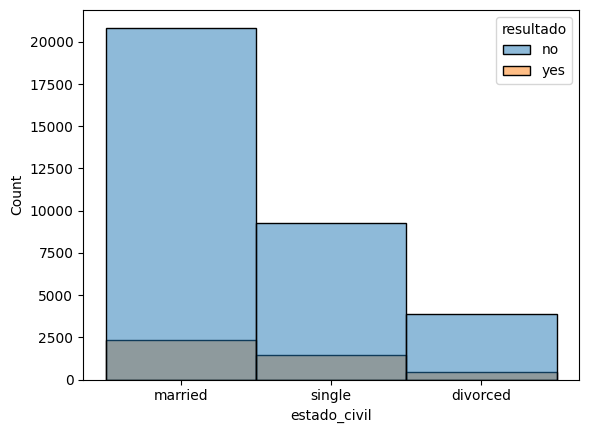

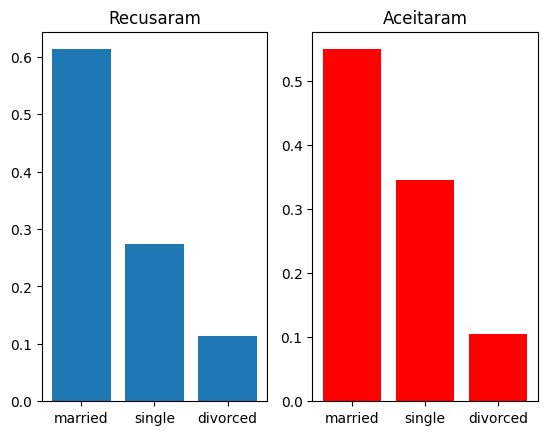

In [10]:
sns.histplot(df, x="estado_civil", hue="resultado")
tmp1 = df[df["resultado"] == 'no']["estado_civil"]
tmp2 = df[df["resultado"] == 'yes']["estado_civil"]
tmp1 = tmp1.value_counts()
tmp2 = tmp2.value_counts()
ind = tmp1.index.tolist()
tmp1 = tmp1/tmp1.sum() 
tmp2 = tmp2/tmp2.sum() 
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(ind,tmp1)
ax1.set_title('Recusaram')
ax2.bar(ind, tmp2, color='r')
ax2.set_title('Aceitaram')


In [11]:
def bootstrap_diff_mean(vet_1, vet_2, n=1000):
    size1, size2 = len(vet_1), len(vet_2)
    values_diff = np.zeros(n)
    for i in range(n):
        np.random.seed(i)
        sample1 = np.random.choice(vet_1, size=size1, replace=True)
        sample2 = np.random.choice(vet_2, size=size2, replace=True)
        values_diff[i] = sample1.mean() - sample2.mean()
    
    pct_inf = np.percentile(values_diff, 2.5)
    pct_sup = np.percentile(values_diff, 97.5)

    return pct_inf.round(4), pct_sup.round(4)

In [12]:
'''tmp1 = df[df["resultado"] == 'no']
tmp1 = tmp1["estado_civil"].replace("divorced", "single")
tmp1 = np.where(tmp1 == "married", 1, 0)
tmp2 = df[df["resultado"] == 'yes']
tmp2 = tmp2["estado_civil"].replace("divorced", "single")
tmp2 = np.where(tmp2 == "married", 1, 0)

print("Ambas as variáveis são vetores binários, tendo valor 1 se o indivíduo representado e casado e 0 caso contrário")
print("tmp1: Pessoas da amostra que não aceitaram a oferta")
print("tmp2: Pessoas da amostra que aceitaram a oferta")
print("Intervalo de confiança da diferença da taxa de aceitação")
bootstrap_diff_mean(tmp1, tmp2)


A lógica desse programa está fixando a resposta, ou seja, dado que alguém aceitou a proposta, 
calculamos se a chance dessa pessoa estar casada é diferente da chance da pessoa não estar casada
O que eu pretendia era o oposto: Dado que se sabe se alguém é casado, a chance dessa pessoa ter
aceitado a oferta da campanha é maior/menor?

ALERTA:Cuidado ao fixar a variável resultado
'''

'tmp1 = df[df["resultado"] == \'no\']\ntmp1 = tmp1["estado_civil"].replace("divorced", "single")\ntmp1 = np.where(tmp1 == "married", 1, 0)\ntmp2 = df[df["resultado"] == \'yes\']\ntmp2 = tmp2["estado_civil"].replace("divorced", "single")\ntmp2 = np.where(tmp2 == "married", 1, 0)\n\nprint("Ambas as variáveis são vetores binários, tendo valor 1 se o indivíduo representado e casado e 0 caso contrário")\nprint("tmp1: Pessoas da amostra que não aceitaram a oferta")\nprint("tmp2: Pessoas da amostra que aceitaram a oferta")\nprint("Intervalo de confiança da diferença da taxa de aceitação")\nbootstrap_diff_mean(tmp1, tmp2)\n\n\nA lógica desse programa está fixando a resposta, ou seja, dado que alguém aceitou a proposta, \ncalculamos se a chance dessa pessoa estar casada é diferente da chance da pessoa não estar casada\nO que eu pretendia era o oposto: Dado que se sabe se alguém é casado, a chance dessa pessoa ter\naceitado a oferta da campanha é maior/menor?\n\nALERTA:Cuidado ao fixar a variáve

In [13]:
tmp1 = df[df["estado_civil"] == 'married']
tmp1 = tmp1["resultado"]
tmp1 = np.where(tmp1 == "yes", 1, 0)

tmp2 = df[df["estado_civil"] != 'married']
tmp2 = tmp2["resultado"]
tmp2 = np.where(tmp2 == "yes", 1, 0)

print("Ambas as variáveis são vetores binários, tendo valor 1 se o aceitou a oferta e 0 caso contrário")
print("tmp1: Pessoas casadas")
print("tmp2: Pessoas não casadas")
print("Intervalo de confiança da diferença da taxa de aceitação de casados e não casados")
bootstrap_diff_mean(tmp1, tmp2)

Ambas as variáveis são vetores binários, tendo valor 1 se o aceitou a oferta e 0 caso contrário
tmp1: Pessoas casadas
tmp2: Pessoas não casadas
Intervalo de confiança da diferença da taxa de aceitação de casados e não casados


(-0.0326, -0.02)

Com base no intervalo de confiança acima, temos evidências para rejeitar a hipótese nula de que a chance de uma pessoa aleatória aceitar a proposta é a mesma se ela for casada ou não.<br>
Tendo em vista o intervalo negativo, a chance de alguém casado aceitar a proposta é menor do que a de uma pessoa não casada.<br>

Tal fato está em concordância com a observação de que o casamento é uma barreira adicional a campanha de marketing, pois mesmo que a campanha convença uma pessoa casada, isso pode não ser o bastante para vender o produto visto que os bens também dizem respeito ao cônjuge da pessoa. 

In [14]:
tmp1 = df[df["idade"] >= 40]
tmp1 = tmp1["resultado"]
tmp1 = np.where(tmp1 == "yes", 1, 0)
tmp2 = df[df["idade"] < 40]
tmp2 = tmp2["resultado"]
tmp2 = np.where(tmp2 == "yes", 1, 0)

print("Ambas as variáveis são vetores binários, tendo valor 1 se o aceitou a oferta e 0 caso contrário")
print("tmp1: Pessoas a partir de 40 anos")
print("tmp2: Pessoas com menos de 40 anos")
print("Intervalo de confiança da diferença da taxa de aceitação entre as faixas etárias")
bootstrap_diff_mean(tmp1, tmp2)

Ambas as variáveis são vetores binários, tendo valor 1 se o aceitou a oferta e 0 caso contrário
tmp1: Pessoas a partir de 40 anos
tmp2: Pessoas com menos de 40 anos
Intervalo de confiança da diferença da taxa de aceitação entre as faixas etárias


(-0.0151, -0.0023)

A média da idade dos participantes foi escolhida para particionar os dados em 2 grupos.<br>
O intervalo de confiança não contém 0, portanto, temos evidência para rejeitar a hipótese nula de que a chance de aceitar o depósito a prazo é a mesma estando acima ou abaixo da média do público alvo.

## 2) Avaliando o impacto do dia em que foi realizada a ligação no resultado da campanha.(Teste de Permutação)

In [15]:
def permutation_test(data, test_value, n_cases=1000):
    qt = []
    for i in range(n_cases):
        sample = data['dia_contato'].sample(frac=1,ignore_index=True)
        data.iloc[:,0] = sample
        
        day_mean = np.mean(data[data['dia_contato'] == 1]['resultado'])

        not_day_mean = np.mean(data[data['dia_contato'] == 0]['resultado'])

        diff = not_day_mean - day_mean
        qt.append(diff)
    IS = np.percentile(qt, 97.5)
    II = np.percentile(qt, 2.5)
    return qt,II,IS

Este teste de hipótese irá fazer a permutação na coluna de dia de contato, desassociando-o do sucesso ou não da campnha, assim podendo testar a diferença entre as médias de sucessos da campanha de marketing quando houve contato no dia passado por parâmetro e de sucesso nos dias que não são o passado, para verificar se existe uma diferença estatisticamente relevante que nos possa indicar um viés de sucesso com base no dia em que entrou-se em contato com o cliente.

In [16]:
days = ['mon','tue','wed','thu','fri']
for d in days:
    tmp_per = df[['dia_contato','resultado']].copy()

    tmp_per['resultado'] = np.where(tmp_per['resultado'] == 'yes',1,0)
    tmp_per['dia_contato'] = np.where(tmp_per['dia_contato'] == d,1,0)

    day_mean = np.mean(tmp_per[tmp_per['dia_contato'] == 1]['resultado'])

    not_day_mean = np.mean(tmp_per[tmp_per['dia_contato'] == 0]['resultado'])
    
    obs = not_day_mean - day_mean

    q, i, s = permutation_test(tmp_per.copy(), d)

    print(f"Dia: {d} - IC: ({np.round(i,2)},{np.round(s,2)}) - Mean: {np.round(np.mean(q),4)}")

Dia: mon - IC: (-0.01,0.01) - Mean: 0.0001
Dia: tue - IC: (-0.01,0.01) - Mean: 0.0
Dia: wed - IC: (-0.01,0.01) - Mean: -0.0001
Dia: thu - IC: (-0.01,0.01) - Mean: -0.0001
Dia: fri - IC: (-0.01,0.01) - Mean: -0.0001


Utilizando um Teste de Permutação simples, calculando a diferença entre as médias de sucessos em um dia especifico e as médias de sucessos quando não foi esse dia, para cada um dos dias, foi possível notar que todos os intervalos de confiança estão com o  cvalor 0 entre eles, indecando que não há uma evidência estatística razoável para se crer que há uma influência direta entre o dia que foi entrado em contato com o cliente e o sucesso ou não da campanha de marketing, aceitando-se assim a Hipótese Nula.

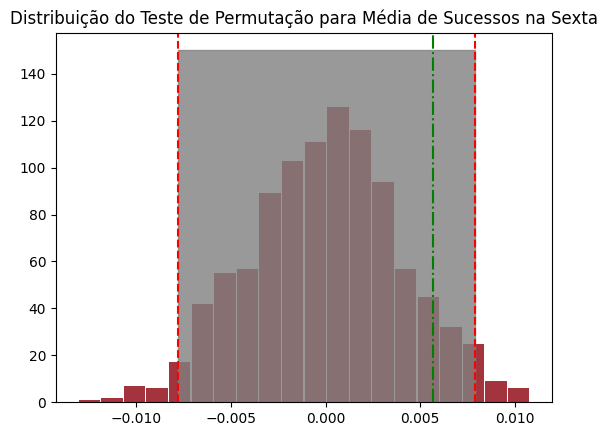

In [17]:
plt.title('Distribuição do Teste de Permutação para Média de Sucessos na Sexta')
plt.axvline(i,color='r',linestyle='--',label='df')
plt.axvline(s,color='r',linestyle='--')
plt.axvline(obs,color='g',linestyle='dashdot')
plt.hist(q,bins=20,rwidth=0.95,color='#A3333D')
plt.fill_between([i, s], 0, 150, color='grey', alpha=0.8)
plt.show()

## 3) Avaliando se o fato de uma pessoa ter contraído algum tipo de empréstimo é relacionado a uma maior proporção de aceites na campanha. 

In [18]:
''' 
    Tratamento do banco de dados antes de realizar o teste.
    As variáveis "emprestimo_imobiliario" e "emprestimo" foram convertidas em uma só variável. 
'''
tmp = df[["emprestimo_imobiliario", "emprestimo", "resultado"]]

loan = []
for i in range(len(tmp)):
    if tmp["emprestimo_imobiliario"].iloc[i] == 'yes' or tmp["emprestimo"].iloc[i] == 'yes':
        loan.append('yes')
    else:
        loan.append('no')

tmp["algum_emprestimo"] = pd.Series(loan)
tmp.drop(["emprestimo", "emprestimo_imobiliario"], axis=1, inplace=True)
tmp.dropna(inplace=True)
tmp.head(3)

,resultado,algum_emprestimo
0,no,no
1,no,no
2,no,yes


In [19]:
def bootstrap_diff_mean_3(vet_1, vet_2, n=1000):
    '''
    Cria teste de hipóteses por diferença de média (proporção de pessoas que contraíram algum empréstimo)
    entre os dois grupos (aceitaram e recusaram a campanha) assumindo uma significância de 5%

    Entrada: 
        vet_1 -> vetor contendo a situação de empréstimo das pessoas que recusaram a campanha (binário)
        vet_2 -> vetor contendo a situação de empréstimo das pessoas que aceitaram a campanha (binário)
    Saída:
        pct_inf -> limite inferior do intervalo de confiança não paramétrico obtido para n amostras 
        pct_sup -> limite superior do intervalo de confiança não paramétrico obtido para n amostras
        
    '''
    size1, size2 = len(vet_1), len(vet_2)
    values_diff = np.zeros(n)
    for i in range(n):
        np.random.seed(i)
    
        sample1 = np.random.choice(vet_1, size=size1, replace=True)
        sample2 = np.random.choice(vet_2, size=size2, replace=True)
        values_diff[i] = sample1.mean() - sample2.mean()
    
    pct_inf = np.percentile(values_diff, 2.5)
    pct_sup = np.percentile(values_diff, 97.5)

    return pct_inf.round(4), pct_sup.round(4), values_diff

In [20]:
tmp1 = tmp[tmp["resultado"] == 'no']["algum_emprestimo"]
tmp1 = np.where(tmp1 == "yes", 1, 0)

tmp2 = tmp[tmp["resultado"] == 'yes']["algum_emprestimo"]
tmp2 = np.where(tmp2 == "yes", 1, 0)

print("IC:", bootstrap_diff_mean_3(tmp1, tmp2)[:2]) # Inclui 0 então é possível explicar pela aleatoriedade

IC: (-0.0331, 0.0021)


O intervalo de confiança para a diferença de média entre os grupos inclui a possibilidade de a estatística ser igual a zero, o que significa que não é possível apontar diferença entre a distribuição da média da variável y (variável Bernoulli indicativa de sucesso no aceite da campanha) para grupos que contraíram pelo menos um tipo de empréstimo no momento em que foram contatados. 

In [21]:
tmp.value_counts()

resultado  algum_emprestimo
no         yes                 19663
           no                  13001
yes        yes                  1811
           no                   1126
Name: count, dtype: int64

Podemos notar que a proporção de pessoas com empréstimo em ambos os casos (resultado == "yes" ou resultado == "no") é bastante semelhante, um indicativo de que não há diferença na distribuição da variável "algum empréstimo" entre os dois grupos. 

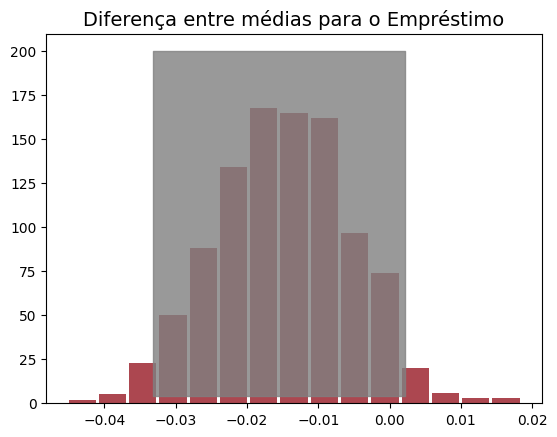

In [22]:
bootstrap = bootstrap_diff_mean_3(tmp1, tmp2)

plt.hist(bootstrap[2], color='#A3333D', alpha=0.9, density=False, bins=15, rwidth=0.9)
plt.title('Diferença entre médias para o Empréstimo', fontsize=14)
plt.fill_between([bootstrap[0], bootstrap[1]], 200, 4, color='grey', alpha=0.8)
fig.tight_layout()
plt.show()

Também é possível observar que a distribuição da diferença de médias entre as amostras aleatórias geradas pelo bootstrap segue uma distribuição normal, conforme comprovado pelo Teorema Central do Limite.

### 4) Avaliar se a amostra é desbalanceada em relação à quantidade de pessoas que aceitaram a campanha.

In [23]:
''' 
    Tratamento do banco de dados antes de realizar o teste.
    As variáveis "emprestimo_imobiliario" e "emprestimo" foram convertidas em uma só variável. 
'''
tmp = df[["emprestimo_imobiliario", "emprestimo", "resultado"]]

loan = []
for i in range(len(tmp)):
    if tmp["emprestimo_imobiliario"].iloc[i] == 'yes' or tmp["emprestimo"].iloc[i] == 'yes':
        loan.append('yes')
    else:
        loan.append('no')

tmp["algum_emprestimo"] = pd.Series(loan)
tmp.drop(["emprestimo", "emprestimo_imobiliario"], axis=1, inplace=True)
tmp.dropna(inplace=True)
tmp.head(3)

,resultado,algum_emprestimo
0,no,no
1,no,no
2,no,yes


#### Teste Hipótese 4

In [24]:
def classic_ic(vetor):
    '''
    Cria teste de hipóteses para a proporção de pessoas que aceitaram a campanha,
    assumindo uma significância de 5%

    Entrada: 
        vetor -> vetor contendo a informação de que a pessoa aceitou ou não a campanha (binário)
    Saída:
        pct_inf -> limite inferior do intervalo de confiança paramétrico obtido para a amostra
        pct_sup -> limite superior do intervalo de confiança paramétrico obtido para a amostra
    '''
    x_bar = np.mean(vetor) # p
    std_bar = np.std(vetor) # p(1-p)
    n = len(vetor)
    
    pct_inf = x_bar - (1.96*std_bar/(n**0.5))
    pct_sup = x_bar + (1.96*std_bar/(n**0.5))

    return pct_inf.round(4), pct_sup.round(4)

In [25]:
tmp3 = np.where(tmp["resultado"] == 'yes', 1, 0)

print("Intervalo de Confiança para a média populacional:", classic_ic(tmp3)) 
print("Média (Proporção) Amostral:", tmp3.mean().round(4))

Intervalo de Confiança para a média populacional: (0.0796, 0.0854)
Média (Proporção) Amostral: 0.0825


O valor de 50% não está incluído no intervalo de confiança para a distribuição real da média populacional $\mu$. Isso significa que o fato de a média da variável y ser de 8,25% é muito raro e não pode ser explicado pela aleatoriedade (caso em que a média é 50%). Outro fator a se analisar pode ser de que a seleção da amostra pode ter sido feita de forma enviesada, e por isso ela foi coletada de forma desbalanceada de uma forma que não pode ser explicada pela aleatoriedade.

In [26]:
print("Estatísticas Descritivas")
pd.Series(tmp3).describe()[:3].round(3)

Estatísticas Descritivas


count    35601.000
mean         0.082
std          0.275
dtype: float64

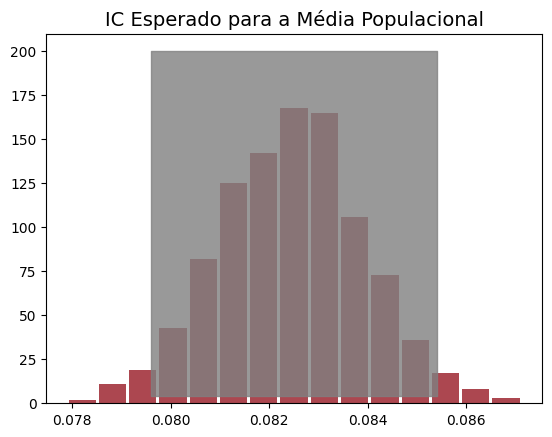

In [27]:
import numpy as np
rand_norm = np.random.normal(tmp3.mean(), tmp3.std()/(len(tmp3)**0.5), 1000)
ic = classic_ic(tmp3)

plt.hist(rand_norm, color='#A3333D', alpha=0.9, density=False, bins=15, rwidth=0.9)
plt.title('IC Esperado para a Média Populacional', fontsize=14)
plt.fill_between([ic[0], ic[1]], 200, 4, color='grey', alpha=0.8)
fig.tight_layout()
plt.show()

Assumindo que a distribuição da proporção amostral segue uma distribuição normal conforme o Teorema Central do Limite, podemos observar que o intervalo de confiança para a proporção de ocorrência do evento y == 1 é bastante distante do caso puramente aleatório (proporção = 50%), rejeitando H0. 

# Problema de Pesquisa

# Regressão Logística

## Encoding

In [28]:
dr = df.sample(frac=1)
dr.head()

,idade,emprego,estado_civil,educacao,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado
32447,31,services,married,high.school,no,no,cellular,may,fri,130,1,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
36933,38,admin.,single,university.degree,yes,no,telephone,jun,tue,42,1,0,nonexistent,-2.9,92.963,-40.8,1.099,5076.2,no
13569,25,admin.,single,high.school,no,yes,cellular,jul,thu,277,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
19587,56,blue-collar,married,basic.9y,yes,no,cellular,aug,thu,89,2,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no
12664,43,blue-collar,married,basic.4y,yes,no,telephone,jul,mon,260,13,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no


In [29]:
dr['estado_civil'] = dr['estado_civil'].replace(['single', 'divorced'], 'non-married')
one_hot_estado_civil = pd.get_dummies(dr['estado_civil'],dtype=int)
dr = dr.drop('estado_civil', axis=1)
dr = dr.join(one_hot_estado_civil)
dr.head()

,idade,emprego,educacao,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado,married,non-married
32447,31,services,high.school,no,no,cellular,may,fri,130,1,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,0
36933,38,admin.,university.degree,yes,no,telephone,jun,tue,42,1,0,nonexistent,-2.9,92.963,-40.8,1.099,5076.2,no,0,1
13569,25,admin.,high.school,no,yes,cellular,jul,thu,277,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,0,1
19587,56,blue-collar,basic.9y,yes,no,cellular,aug,thu,89,2,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,no,1,0
12664,43,blue-collar,basic.4y,yes,no,telephone,jul,mon,260,13,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,1,0


In [30]:
dr['educacao'] = dr['educacao'].replace(['basic.4y', 'basic.9y', 'basic.6y'], 'basic')
one_hot_educacao = pd.get_dummies(dr['educacao'],dtype=int)
dr = dr.drop('educacao', axis=1)
dr = dr.join(one_hot_educacao)
dr.head()

,idade,emprego,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,duracao_contato,num_contatos,contatos_anteriores,...,Euribor,num_empregados,resultado,married,non-married,basic,high.school,illiterate,professional.course,university.degree
32447,31,services,no,no,cellular,may,fri,130,1,0,...,1.313,5099.1,no,1,0,0,1,0,0,0
36933,38,admin.,yes,no,telephone,jun,tue,42,1,0,...,1.099,5076.2,no,0,1,0,0,0,0,1
13569,25,admin.,no,yes,cellular,jul,thu,277,1,0,...,4.963,5228.1,no,0,1,0,1,0,0,0
19587,56,blue-collar,yes,no,cellular,aug,thu,89,2,0,...,4.968,5228.1,no,1,0,1,0,0,0,0
12664,43,blue-collar,yes,no,telephone,jul,mon,260,13,0,...,4.960,5228.1,no,1,0,1,0,0,0,0


In [31]:
dr['emprestimo'] = dr['emprestimo'].replace(['yes', 'no'], [1,0])
dr['emprestimo_imobiliario'] = dr['emprestimo_imobiliario'].replace(['yes', 'no'], [1,0])
dr.head()

,idade,emprego,emprestimo_imobiliario,emprestimo,forma_contato,mes_contato,dia_contato,duracao_contato,num_contatos,contatos_anteriores,...,Euribor,num_empregados,resultado,married,non-married,basic,high.school,illiterate,professional.course,university.degree
32447,31,services,0,0,cellular,may,fri,130,1,0,...,1.313,5099.1,no,1,0,0,1,0,0,0
36933,38,admin.,1,0,telephone,jun,tue,42,1,0,...,1.099,5076.2,no,0,1,0,0,0,0,1
13569,25,admin.,0,1,cellular,jul,thu,277,1,0,...,4.963,5228.1,no,0,1,0,1,0,0,0
19587,56,blue-collar,1,0,cellular,aug,thu,89,2,0,...,4.968,5228.1,no,1,0,1,0,0,0,0
12664,43,blue-collar,1,0,telephone,jul,mon,260,13,0,...,4.960,5228.1,no,1,0,1,0,0,0,0


In [32]:
one_hot_forma_contato = pd.get_dummies(dr['forma_contato'],dtype=int)
dr = dr.drop('forma_contato', axis=1)
dr = dr.join(one_hot_forma_contato)
dr.head()

,idade,emprego,emprestimo_imobiliario,emprestimo,mes_contato,dia_contato,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,...,resultado,married,non-married,basic,high.school,illiterate,professional.course,university.degree,cellular,telephone
32447,31,services,0,0,may,fri,130,1,0,nonexistent,...,no,1,0,0,1,0,0,0,1,0
36933,38,admin.,1,0,jun,tue,42,1,0,nonexistent,...,no,0,1,0,0,0,0,1,0,1
13569,25,admin.,0,1,jul,thu,277,1,0,nonexistent,...,no,0,1,0,1,0,0,0,1,0
19587,56,blue-collar,1,0,aug,thu,89,2,0,nonexistent,...,no,1,0,1,0,0,0,0,1,0
12664,43,blue-collar,1,0,jul,mon,260,13,0,nonexistent,...,no,1,0,1,0,0,0,0,0,1


In [33]:
one_hot_mes = pd.get_dummies(dr['mes_contato'],dtype=int)
dr = dr.drop('mes_contato', axis=1)
dr = dr.join(one_hot_mes)
dr.head()

,idade,emprego,emprestimo_imobiliario,emprestimo,dia_contato,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,...,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
32447,31,services,0,0,fri,130,1,0,nonexistent,-1.8,...,0,0,0,0,0,0,1,0,0,0
36933,38,admin.,1,0,tue,42,1,0,nonexistent,-2.9,...,0,0,0,0,1,0,0,0,0,0
13569,25,admin.,0,1,thu,277,1,0,nonexistent,1.4,...,0,0,0,1,0,0,0,0,0,0
19587,56,blue-collar,1,0,thu,89,2,0,nonexistent,1.4,...,0,1,0,0,0,0,0,0,0,0
12664,43,blue-collar,1,0,mon,260,13,0,nonexistent,1.4,...,0,0,0,1,0,0,0,0,0,0


In [34]:
one_hot_dia = pd.get_dummies(dr['dia_contato'],dtype=int)
dr = dr.drop('dia_contato', axis=1)
dr = dr.join(one_hot_dia)
dr.head()

,idade,emprego,emprestimo_imobiliario,emprestimo,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,...,mar,may,nov,oct,sep,fri,mon,thu,tue,wed
32447,31,services,0,0,130,1,0,nonexistent,-1.8,92.893,...,0,1,0,0,0,1,0,0,0,0
36933,38,admin.,1,0,42,1,0,nonexistent,-2.9,92.963,...,0,0,0,0,0,0,0,0,1,0
13569,25,admin.,0,1,277,1,0,nonexistent,1.4,93.918,...,0,0,0,0,0,0,0,1,0,0
19587,56,blue-collar,1,0,89,2,0,nonexistent,1.4,93.444,...,0,0,0,0,0,0,0,1,0,0
12664,43,blue-collar,1,0,260,13,0,nonexistent,1.4,93.918,...,0,0,0,0,0,0,1,0,0,0


In [35]:
dr['resultado_anterior'] = dr['resultado_anterior'].replace(['failure','nonexistent', 'success'], [-1,0,1])
dr.head()

,idade,emprego,emprestimo_imobiliario,emprestimo,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,...,mar,may,nov,oct,sep,fri,mon,thu,tue,wed
32447,31,services,0,0,130,1,0,0,-1.8,92.893,...,0,1,0,0,0,1,0,0,0,0
36933,38,admin.,1,0,42,1,0,0,-2.9,92.963,...,0,0,0,0,0,0,0,0,1,0
13569,25,admin.,0,1,277,1,0,0,1.4,93.918,...,0,0,0,0,0,0,0,1,0,0
19587,56,blue-collar,1,0,89,2,0,0,1.4,93.444,...,0,0,0,0,0,0,0,1,0,0
12664,43,blue-collar,1,0,260,13,0,0,1.4,93.918,...,0,0,0,0,0,0,1,0,0,0


In [36]:
pd.set_option('display.max_columns', None)

In [37]:
one_hot_emprego = pd.get_dummies(dr['emprego'],dtype=int)
dr = dr.drop('emprego', axis=1)
dr = dr.join(one_hot_emprego)
dr.head()

,idade,emprestimo_imobiliario,emprestimo,duracao_contato,num_contatos,contatos_anteriores,resultado_anterior,indice_desemprego,CPI,CCI,Euribor,num_empregados,resultado,married,non-married,basic,high.school,illiterate,professional.course,university.degree,cellular,telephone,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,fri,mon,thu,tue,wed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
32447,31,0,0,130,1,0,0,-1.8,92.893,-46.2,1.313,5099.1,no,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
36933,38,1,0,42,1,0,0,-2.9,92.963,-40.8,1.099,5076.2,no,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
13569,25,0,1,277,1,0,0,1.4,93.918,-42.7,4.963,5228.1,no,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
19587,56,1,0,89,2,0,0,1.4,93.444,-36.1,4.968,5228.1,no,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
12664,43,1,0,260,13,0,0,1.4,93.918,-42.7,4.960,5228.1,no,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Separando os dados em treino e teste

In [39]:
dfs = np.array_split(dr, 7)
treino = dfs[:5]
teste = dfs[5:]

In [40]:
def sig(X, theta):
    return 1.0 / (1.0 + np.exp(-X.dot(theta)))